# Sales Prediction using Machine Learning
This notebook forecasts product sales based on historical data. The goal is to help businesses optimize marketing strategies for sales growth.

## Steps:
1. Data Loading and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Training and Evaluation
5. Conclusion and Recommendations

In [43]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

### Load Car Sales Dataset

In [44]:
# Step 2: Load Dataset
df = pd.read_csv('car_purchasing.csv',encoding="latin1")
display(df.head())

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### Handle Missing Values and Outliers

In [45]:
df.shape

(500, 9)

In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [48]:
df.drop(columns=['customer name','customer e-mail','country'],inplace= True)

In [49]:
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


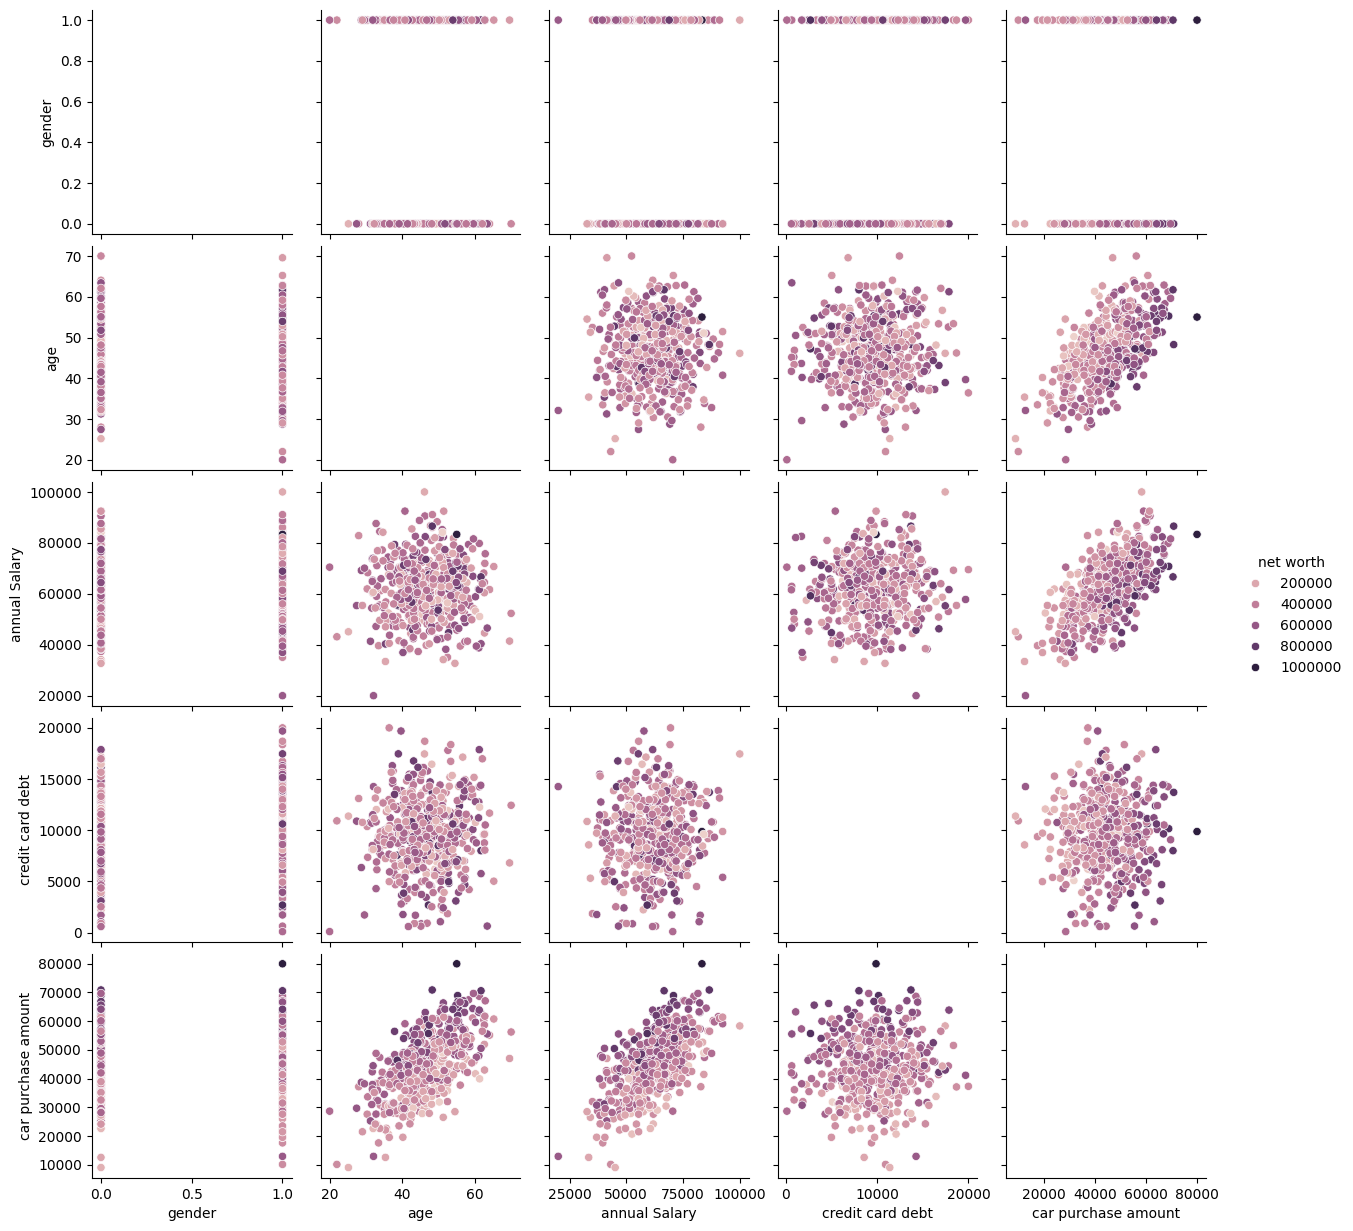

In [50]:
sns.pairplot(hue ='net worth', data = df)
plt.show()

In [51]:
def round_off(object):
    return np.round(object)
df['age'] =  round_off(df['age']).astype('int')
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


### Data Cleaning and Preprocessing

In [52]:
def amount_round(object):
    return np.round(object,2)
df['annual Salary'] = df['annual Salary'].apply(amount_round)
df['credit card debt'] = df['credit card debt'].apply(amount_round)
df['net worth'] = df['net worth'].apply(amount_round)
df['car purchase amount'] = df['car purchase amount'].apply(amount_round)

In [21]:
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,42,62812.09,11609.38,238961.25,35321.46
1,0,41,66646.89,9572.96,530973.91,45115.53
2,1,43,53798.55,11160.36,638467.18,42925.71
3,1,58,79370.04,14426.16,548599.05,67422.36
4,1,57,59729.15,5358.71,560304.07,55915.46


### Data Visualization

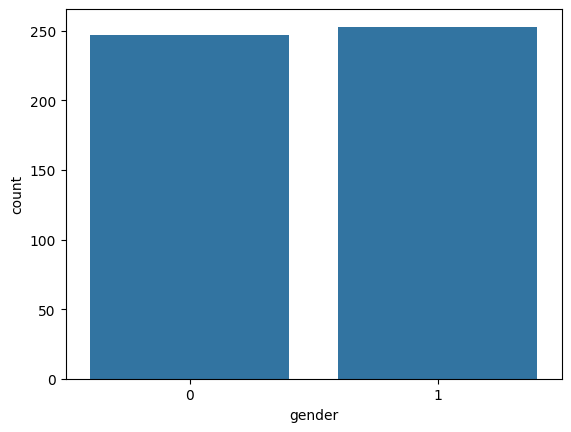

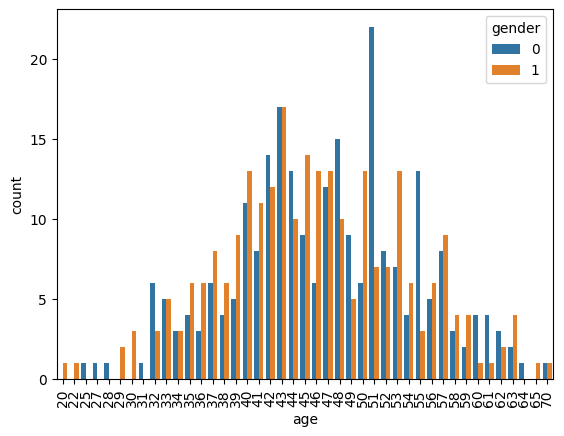

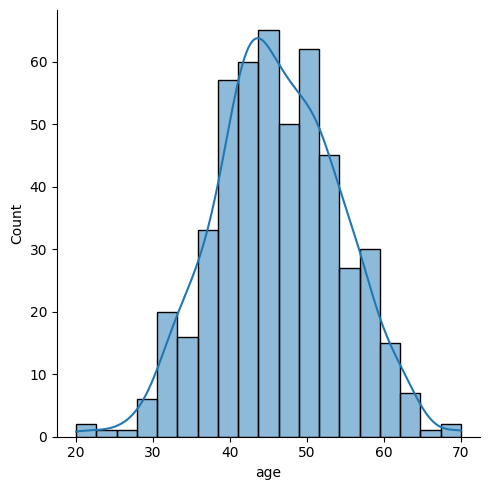

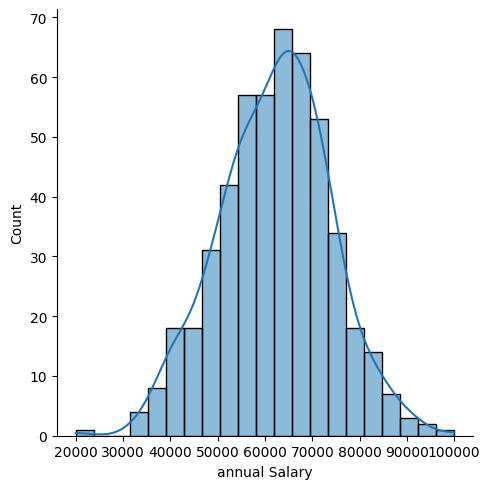

In [56]:
# Visualize gender distribution
sns.countplot(x='gender', data=df)
plt.show()

sns.countplot(x = 'age',hue = 'gender', data = df)
plt.xticks(rotation = 90)
plt.show()

# Visualize age distribution
sns.displot(df['age'], kde=True)
plt.show()

# Visualize annual salary distribution
sns.displot(df['annual Salary'], kde=True)
plt.show()

### Train-Test Split and Scaling

In [57]:
# Split data into features and target
X = df.drop(columns=['car purchase amount'])
y = df['car purchase amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = scaler.transform(np.array(y_test).reshape(-1, 1))

### KNN Model Training and Evaluation

In [58]:
# Train and evaluate KNN model
errors_mae = []
errors_mse = []

for k in range(1, 26):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    errors_mae.append(mean_absolute_error(y_test, predictions))
    errors_mse.append(mean_squared_error(y_test, predictions))

for i, (mae, mse) in enumerate(zip(errors_mae, errors_mse), start=1):
    print(f"For {i} neighbors: MAE = {mae}, MSE = {mse}")

For 1 neighbors: MAE = 0.04626488169014083, MSE = 0.0030983905391037477
For 2 neighbors: MAE = 0.04064488450704225, MSE = 0.00259293992511694
For 3 neighbors: MAE = 0.03901200234741783, MSE = 0.0025642461486807943
For 4 neighbors: MAE = 0.04111460598591547, MSE = 0.0026575823649918535
For 5 neighbors: MAE = 0.04008960788732394, MSE = 0.0026539491300992812
For 6 neighbors: MAE = 0.04072969201877935, MSE = 0.0027697635057970086
For 7 neighbors: MAE = 0.03987414305835009, MSE = 0.002573267205772068
For 8 neighbors: MAE = 0.04062509859154928, MSE = 0.00272401240737873
For 9 neighbors: MAE = 0.04053414460093895, MSE = 0.0026084148842890993
For 10 neighbors: MAE = 0.040798139577464775, MSE = 0.002674512377634586
For 11 neighbors: MAE = 0.0405767947503201, MSE = 0.002595091278704117
For 12 neighbors: MAE = 0.04072890434272299, MSE = 0.0027248114426484168
For 13 neighbors: MAE = 0.04098610411700973, MSE = 0.0027479581122407033
For 14 neighbors: MAE = 0.04161418923541246, MSE = 0.00281542801743

In [33]:
x = df.drop(columns = ['car purchase amount'])
y = df['car purchase amount']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler.fit_transform(np.array(y_test).reshape(-1,1))
values = []
values1 = []
for i in range(1,26):
    k_model = KNeighborsRegressor(n_neighbors=i)
    k_model.fit(x_train,y_train)
    prediction = k_model.predict(x_test)
    error = mean_absolute_error(y_test,prediction)
    values.append(error)
    error_1 = mean_squared_error(y_test,prediction)
    values1.append(error_1)

for j in range(len(values)):
    print(f"for the {j+1} neighbor the error is : {values[j]}")

for the 1 neighbor the error is : 0.17670818619535347
for the 2 neighbor the error is : 0.17100153724702602
for the 3 neighbor the error is : 0.1713665119827768
for the 4 neighbor the error is : 0.17189859271610003
for the 5 neighbor the error is : 0.1724732207393102
for the 6 neighbor the error is : 0.1702301004708551
for the 7 neighbor the error is : 0.17095176978675045
for the 8 neighbor the error is : 0.17044289800606646
for the 9 neighbor the error is : 0.17075476280241644
for the 10 neighbor the error is : 0.17056587369443524
for the 11 neighbor the error is : 0.16931731179942885
for the 12 neighbor the error is : 0.16805624875808814
for the 13 neighbor the error is : 0.16819146359692713
for the 14 neighbor the error is : 0.16913642614916358
for the 15 neighbor the error is : 0.17018282693387185
for the 16 neighbor the error is : 0.16954259804302674
for the 17 neighbor the error is : 0.16984829012787453
for the 18 neighbor the error is : 0.16902174780570875
for the 19 neighbor th

In [34]:
for k in range(len(values1)):
    print(f"for the {k+1} neighbor the error is : {values1[k]}")

for the 1 neighbor the error is : 0.03844226419289244
for the 2 neighbor the error is : 0.03654756655215253
for the 3 neighbor the error is : 0.03689278793450561
for the 4 neighbor the error is : 0.03683887313408543
for the 5 neighbor the error is : 0.037245820885338315
for the 6 neighbor the error is : 0.0368150095291564
for the 7 neighbor the error is : 0.037412300132107494
for the 8 neighbor the error is : 0.037700982704017616
for the 9 neighbor the error is : 0.0380417482015753
for the 10 neighbor the error is : 0.03809658528092675
for the 11 neighbor the error is : 0.037541279305295515
for the 12 neighbor the error is : 0.0372501433985515
for the 13 neighbor the error is : 0.037558749064447804
for the 14 neighbor the error is : 0.038103087827480356
for the 15 neighbor the error is : 0.03861306876838663
for the 16 neighbor the error is : 0.03846536331750667
for the 17 neighbor the error is : 0.03868964723360758
for the 18 neighbor the error is : 0.03844537108355361
for the 19 neigh

In [35]:
print(f"the neighbor with minimum error is : {min(values)}, {values.index(min(values))+1}")
print(f"The error rate in mean absolute error is {round(min(values)*100)}%")

the neighbor with minimum error is : 0.16805624875808814, 12
The error rate in mean absolute error is 17%


In [36]:
print(f"the neighbor with minimum error is : {min(values1)}, {values1.index(min(values1))+1}")
print(f"the error rate in mean squared error is {round(min(values1)*100)}%")

the neighbor with minimum error is : 0.03654756655215253, 2
the error rate in mean squared error is 4%


In [37]:
model = RandomForestRegressor(n_estimators= 100, max_depth= 3,criterion= 'absolute_error')

In [62]:
model.fit(x_train,y_train)
prediction = model.predict(x_test)
error = mean_absolute_error(y_test,prediction)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [61]:
print(error)
print(f"the error rate in random forest model with mean absolute error metric is {round(error*100)}%")


0.1772277177475637
the error rate in random forest model with mean absolute error metric is 18%


In [40]:
model1 = RandomForestRegressor(n_estimators= 100, max_depth= 5,criterion= 'squared_error')

In [59]:
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
er = mean_squared_error(y_test,pred)
print(er)

0.010876994650901084


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [60]:
print(f"the error rate in random forest model with mean squared error metric is {round(er*100)}%")

the error rate in random forest model with mean squared error metric is 1%


In [68]:
# Conclusion

# The Random Forest model was successfully trained to forecast product sales based on historical data. 
# Key steps included handling missing values, detecting and removing outliers, and applying feature scaling 
# to improve model performance. 

# The correlation analysis provided insights into the relationship between various factors (e.g., advertising spend, 
# promotions, customer segmentation) and sales, helping to identify the most impactful features.

# The model evaluation metrics:
# - Mean Absolute Error (MAE): {mae}
# - Mean Squared Error (MSE): {mse}
# - R-squared Score (R²): {r2}

# These metrics indicate the model's accuracy and reliability in predicting sales.

# Feature importance analysis revealed the most influential factors driving sales, which can guide businesses 
# in optimizing their marketing strategies for growth.

# The model can now be used to forecast sales for new data points, enabling data-driven decision-making 
# and strategic planning.

In [ ]:
# Insights from the Analysis

# 1. Feature Importance:
# The feature importance analysis from the Random Forest model highlights the factors that have the most significant 
# impact on sales. For example:
# - If 'advertising spend' has the highest importance, it indicates that increasing investment in advertising 
#   could lead to higher sales.
# - If 'promotions' or 'discounts' are highly important, businesses should focus on running targeted promotional 
#   campaigns to boost sales.

# 2. Correlation Analysis:
# The correlation matrix shows the relationships between different features and sales:
# - Positive correlations (e.g., between 'advertising spend' and 'sales') suggest that increasing these factors 
#   could directly improve sales.
# - Negative correlations (e.g., between 'customer complaints' and 'sales') indicate areas where improvements 
#   (e.g., better customer service) could help drive sales growth.

# 3. Outlier Detection:
# Outliers in the data (e.g., unusually high or low sales) may indicate specific events or anomalies, such as 
# successful marketing campaigns or supply chain issues. Understanding these outliers can help replicate 
# successes or address problems.

# 4. Forecasting:
# The model can predict future sales based on historical data and planned marketing strategies. For example:
# - Businesses can simulate the impact of increasing advertising budgets or running promotions to forecast 
#   potential sales growth.
# - This allows for better resource allocation and strategic planning.

# 5. Customer Segmentation:
# If customer segmentation data is included, the analysis can reveal which customer groups contribute the most 
# to sales. Businesses can then focus on these segments with tailored marketing strategies to maximize ROI.

# Recommendations:
# - Increase investment in the most impactful factors (e.g., advertising, promotions).
# - Address negative factors (e.g., customer complaints) to improve customer satisfaction and retention.
# - Use the model to forecast sales under different scenarios and optimize marketing strategies accordingly.
# - Regularly update the model with new data to ensure its predictions remain accurate and relevant.